In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
# 1. Add Gaussian noise per channel
def add_gaussian_noise_rgb(image, mean=0, sigma=20):
    noisy = image.astype(np.int16)
    for c in range(3):
        noise = np.random.normal(mean, sigma, image.shape[:2]).astype(np.int16)
        noisy[:, :, c] += noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

# 2. Otsu's threshold on a single-channel image
def otsu_threshold(image):
    hist = np.bincount(image.flatten(), minlength=256)
    total = image.size
    sum_total = np.dot(np.arange(256), hist)
    wB, muB = 0, 0
    wF, muF = 1, sum_total / total
    max_var, thresh = 0, 0
    for t in range(256):
        p_t = hist[t] / total
        wBn, wFn = wB + p_t, wF - p_t
        if wBn > 0:
            muB = (muB * wB + t * p_t) / wBn
        if wFn > 0:
            muF = (muF * wF - t * p_t) / wFn
        wB, wF = wBn, wFn
        var_between = wB * wF * (muB - muF)**2
        if var_between > max_var:
            max_var, thresh = var_between, t
    return thresh

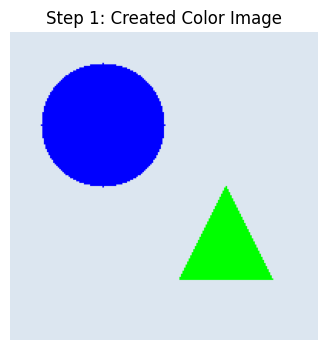

In [4]:
light_background = (240, 230, 220)
color_img = np.full((200, 200, 3), light_background, dtype=np.uint8)

# Draw a blue circle
cv2.circle(color_img, (60, 60), 40, (255, 0, 0), -1)  # BGR format (Blue)

# Draw a green triangle
pts = np.array([[140, 100], [110, 160], [170, 160]], np.int32)
cv2.fillPoly(color_img, [pts], (0, 255, 0))  # Green

# Convert BGR to RGB for display using matplotlib
img_dis = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(img_dis)
plt.title("Step 1: Created Color Image")
plt.axis("off")
plt.show()

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

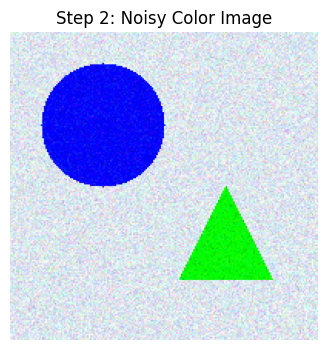

In [5]:
noisy_color = add_gaussian_noise_rgb(color_img)

plt.figure(figsize=(4, 4))
plt.imshow(cv2.cvtColor(noisy_color, cv2.COLOR_BGR2RGB))
plt.title("Step 2: Noisy Color Image")
plt.axis("off")

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

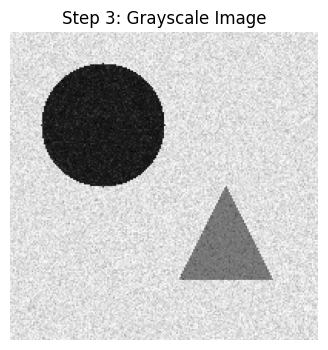

In [6]:
gray = cv2.cvtColor(noisy_color, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(4, 4))
plt.imshow(gray, cmap='gray')
plt.title("Step 3: Grayscale Image")
plt.axis("off")

Text(0.5, 1.0, 'Step 4: Histogram of Grayscale')

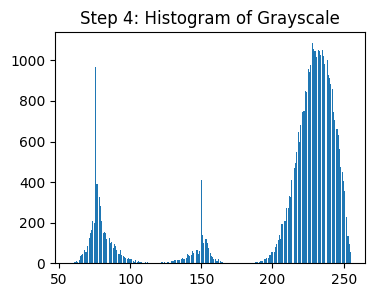

In [7]:
plt.figure(figsize=(4, 3))
plt.hist(gray.ravel(), bins=256)
plt.title("Step 4: Histogram of Grayscale")

In [8]:
t = otsu_threshold(gray)
print(f"Step 5: Computed Otsu Threshold = {t}")

Step 5: Computed Otsu Threshold = 164


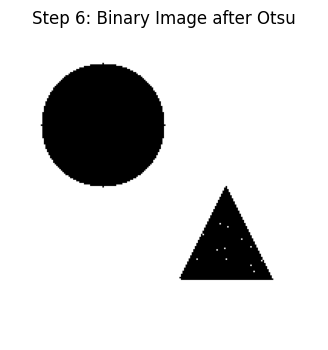

In [9]:
binary = (gray > t).astype(np.uint8) * 255
plt.figure(figsize=(4, 4))
plt.imshow(binary, cmap='gray')
plt.title("Step 6: Binary Image after Otsu")
plt.axis("off")
plt.show()

**Question 2**

In [10]:

def region_growing(image, seed_points, threshold=50):
    height, width = image.shape
    segmented = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)

    for seed in seed_points:
        x, y = seed
        seed_value = image[x, y]
        to_visit = [(x, y)]

        while to_visit:
            cx, cy = to_visit.pop()
            if visited[cx, cy]:
                continue
            visited[cx, cy] = True

            if abs(int(image[cx, cy]) - int(seed_value)) <= threshold:
                segmented[cx, cy] = 255
                # 4-neighbors
                for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                    nx, ny = cx + dx, cy + dy
                    if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                        to_visit.append((nx, ny))
    return segmented





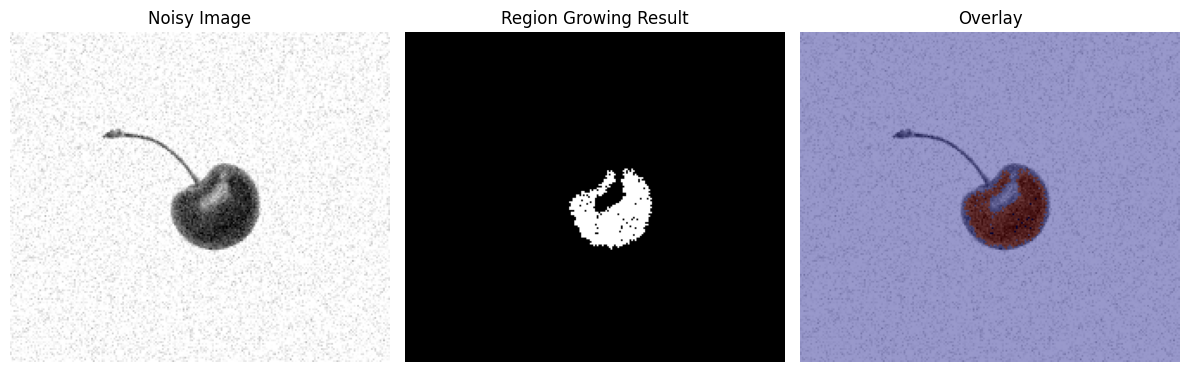

In [14]:

image = np.zeros((200, 200), dtype=np.uint8)
image = cv2.imread('/content/cv_input.jpg', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
noise = np.random.normal(0, 20, image.shape).astype(np.int16)
noisy_image = np.clip(image.astype(np.int16) + noise, 0, 255).astype(np.uint8)

# Define seed point
seeds = [(100, 100)]

# Apply region growing
result = region_growing(noisy_image, seeds, threshold=50)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Region Growing Result")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(noisy_image, cmap='gray')
plt.imshow(result, cmap='jet', alpha=0.4)
plt.axis('off')

plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(219.5), np.float64(190.5), np.float64(-0.5))

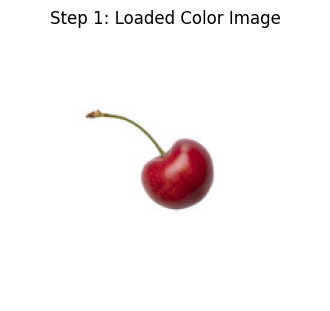

In [15]:
# Step 1: Load Original image
image_path = '/content/cv_input.jpg'
img_color_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
if img_color_bgr is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
img_rgb = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.title("Step 1: Loaded Color Image")
plt.axis('off')

(np.float64(-0.5), np.float64(219.5), np.float64(190.5), np.float64(-0.5))

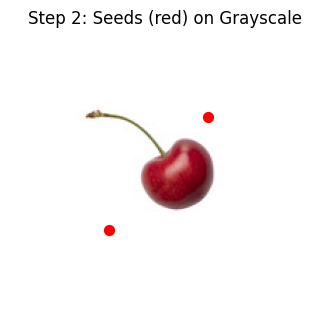

In [16]:
# Step 2: Show seeds on image
seeds = [(60, 140), (140, 70)]
plt.figure(figsize=(4,4))
plt.imshow(img_rgb, cmap='gray')
plt.scatter([y for x, y in seeds], [x for x, y in seeds], c='red', s=50)
plt.title("Step 2: Seeds (red) on Grayscale")
plt.axis('off')